<b>IMPORT PANDAS AND SKLEARN LIBRARY</b>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
enc = OneHotEncoder(handle_unknown='ignore')
le = preprocessing.LabelEncoder()

<b>CALL DATA FOR ANALYSIS</b>

In [3]:
df = pd.read_csv("attrition.csv", delimiter=";")

<b>CONVERT CATEGORICAL ATTRIBUTES INTO DUMMY VARIABLES</b>

In [4]:
df["BusinessTravel"] = pd.Categorical(df["BusinessTravel"])
dfDummies = pd.get_dummies(df["BusinessTravel"], prefix = "BusinessTravel")
df = pd.concat([df, dfDummies], axis=1)

df["Department"] = pd.Categorical(df["Department"])
dfDummies = pd.get_dummies(df["Department"], prefix = "Department")
df = pd.concat([df, dfDummies], axis=1)

df["EducationField"] = pd.Categorical(df["EducationField"])
dfDummies = pd.get_dummies(df["EducationField"], prefix = "EducationField")
df = pd.concat([df, dfDummies], axis=1)

df["Gender"] = pd.Categorical(df["Gender"])
dfDummies = pd.get_dummies(df["Gender"], prefix = "Gender")
df = pd.concat([df, dfDummies], axis=1)

df["JobRole"] = pd.Categorical(df["JobRole"])
dfDummies = pd.get_dummies(df["JobRole"], prefix = "JobRole")
df = pd.concat([df, dfDummies], axis=1)

df["MaritalStatus"] = pd.Categorical(df["MaritalStatus"])
dfDummies = pd.get_dummies(df["MaritalStatus"], prefix = "MaritalStatus")
df = pd.concat([df, dfDummies], axis=1)

df.drop(["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus"], axis=1, inplace=True)

<b>CHECK DATA ATTRIBUTES</b>

In [6]:
df.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,Yes,1.0,2,2,4,5993,3,1,1,...,0,0,0,0,0,1,0,0,0,1
1,49,No,8.0,1,3,2,5130,4,4,3,...,0,0,0,0,1,0,0,0,1,0
2,37,Yes,2.0,2,4,3,2090,3,2,3,...,1,0,0,0,0,0,0,0,0,1
3,59,No,8.5,3,3,1,2670,4,1,2,...,1,0,0,0,0,0,0,0,1,0
4,38,No,23.0,3,4,3,9526,4,2,3,...,0,0,1,0,0,0,0,0,0,1


<b>DEFINE FEATURES AND TARGET VARIABLE</b>

In [11]:
feature_cols = ["Age", "DistanceFromHome", "Education", "EnvironmentSatisfaction", "JobSatisfaction", "MonthlyIncome", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance"]
X = df[feature_cols] # Features
y = df.Attrition # Target variable

<b>SPLIT TRAIN AND TEST DATA</b>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

<b>DECISION TREE PREDICTION</b>

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3) #with entropy and maximum depth of 3 branch

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

<b>MODEL ACCURACY TEST</b>

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5714285714285714


<b>DECISION TREE VISUALIZATION</b>

C:\Users\iel\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


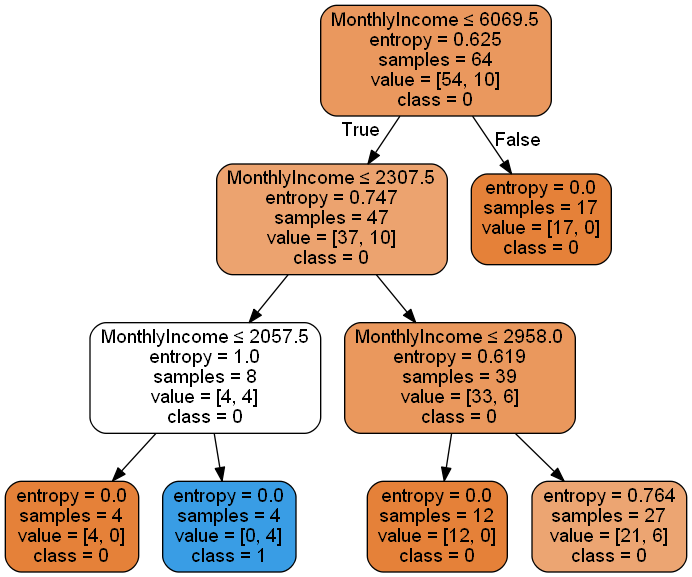

In [15]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('uas.png')
Image(graph.create_png())